# Formative Assessment

k-Means puts data points in predetermined clusters. There is another algorithm allows the learning algorithm to determine the number of clusters. This is a hierarchical clustering algorithm. An agglomerative clustering algorithm builds clusters using a bottom up approach. Each data point starts off in its own cluster. The algorithm then iteratively combines clusters until it forms one cluster. 

The results of the algorithm are shown using a dendogram. A dendogram is an upside down tree. At the bottom are the singleton clusters or clusters with single data points. At the top of the tree is a root, or the single cluster. 

### The data

The dataset was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Air+quality) and "contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005, for one year. Hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) were provided by a co-located reference certified analyzer. Missing values are tagged with -200 value."

The following are the descriptions of the columns we will be working with:

    0 Date (DD/MM/YYYY)
    1 Time (HH.MM.SS)
    2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
    3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
    4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
    5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
    6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
    7 True hourly averaged NOx concentration in ppb (reference analyzer)
    8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
    9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
    10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
    11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
    12 Temperature in °C
    13 Relative Humidity (%)
    14 AH Absolute Humidity 
    

### The goal
The goal of the assessment is to determine the optimal number of clusters for the learning algorithm. Use the agglomerative clustering technique in the `scipy` package to do this. Use the dataset `AirQualityUCI.csv`. More specifically, determine if there is a relationship between the predictor features `PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)` and `True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)`

### Import the libraries

Import the necessary libraries for file manipulation and learning algorithms. Do not forget to upload the visualizations packages as well.

In [1]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('AirQualityUCI.csv')

In [3]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,0.7888


### Preprocess the data

Observe that there a missing values in the dataset. Imput missing values with the mean or median. Can you make any suggestions for standardizing or normalising the data points?

In [4]:
(data.iloc[:, 2:] == -200.0).sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
AH                366
dtype: int64

In [5]:
data.replace(-200.0, data.median(), inplace=True)

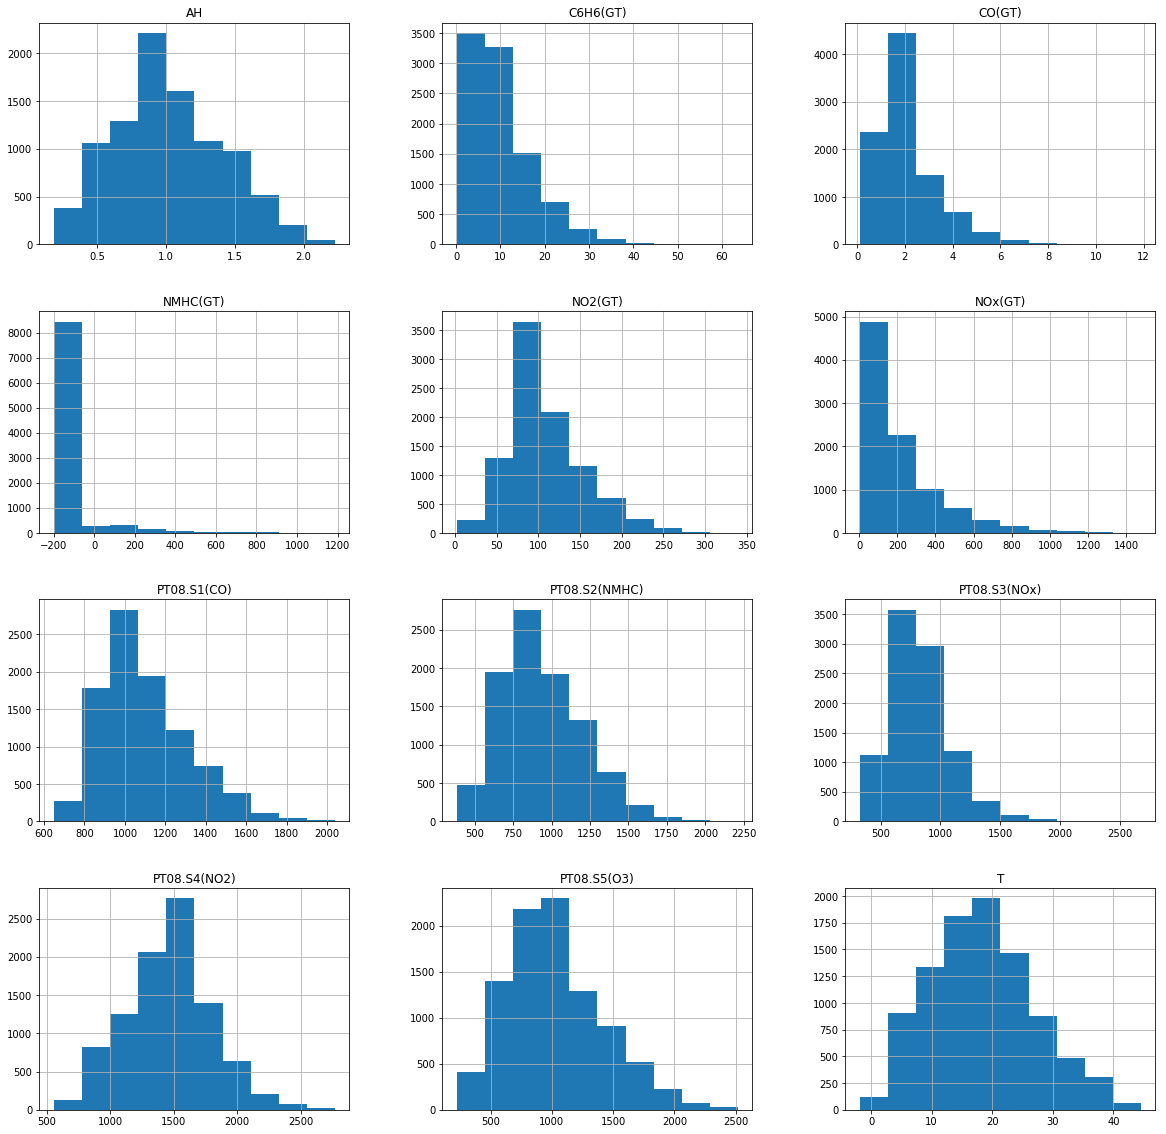

In [6]:
pd.DataFrame.hist(data, figsize=(20,20));

In [7]:
from pandas.plotting import scatter_matrix

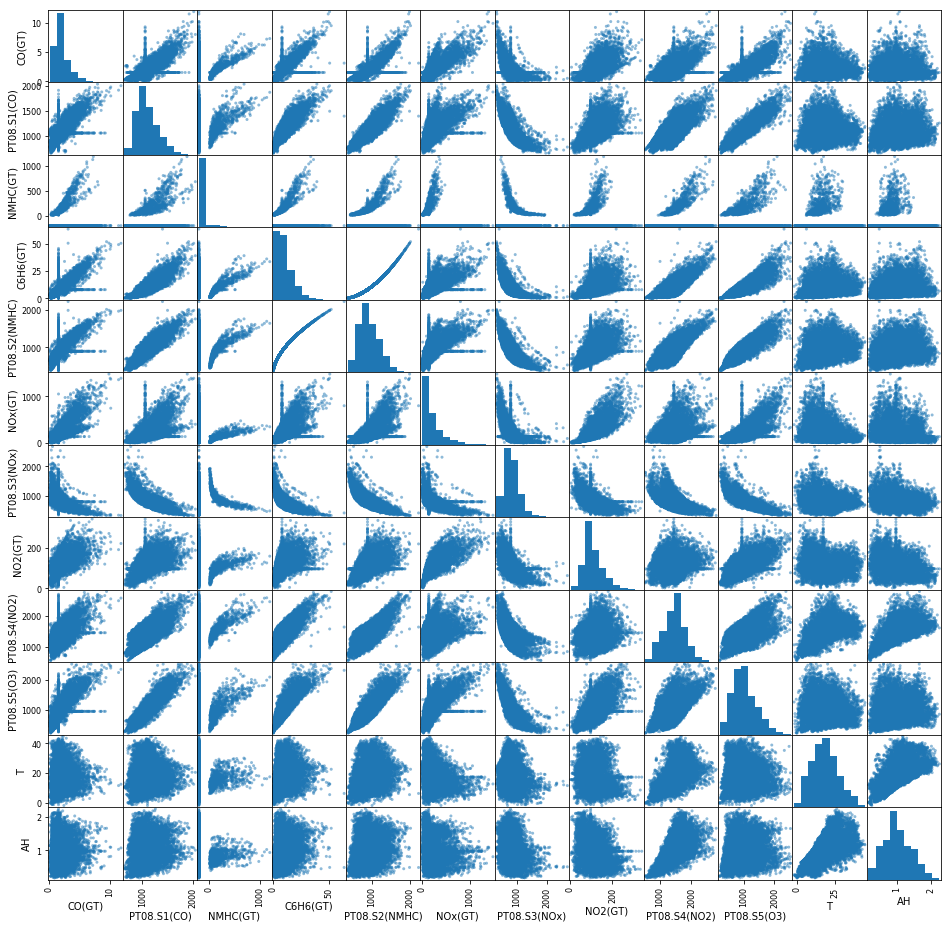

In [8]:
scatter_matrix(data, figsize=(16,16));

In [9]:
data.mean()

CO(GT)              2.035343
PT08.S1(CO)      1098.001282
NMHC(GT)         -159.090093
C6H6(GT)            9.997713
PT08.S2(NMHC)     937.426312
NOx(GT)           228.347547
PT08.S3(NOx)      833.870578
NO2(GT)           110.092017
PT08.S4(NO2)     1455.863097
PT08.S5(O3)      1019.741477
T                  18.274105
AH                  1.023624
dtype: float64

In [10]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.035343,1098.001282,-159.090093,9.997713,937.426312,228.347547,833.870578,110.092017,1455.863097,1019.741477,18.274105,1.023624
std,1.339737,212.985308,139.789093,7.314906,261.700283,197.570902,251.872460,44.399549,339.373394,390.927152,8.660352,0.395948
min,0.100000,647.000000,-200.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,0.184700
25%,1.200000,941.000000,-200.000000,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,0.746100
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,2.231000


The data point can be standardised by using a method known as RobustScalar.RobustScaler subtracts the column median and divides by the interquartile range. This is shown below.
An example is made below using the predictor features PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) and C6H6(GT)	True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

# Standardizing or Nomalizing the dataset

/Users/irenuga/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


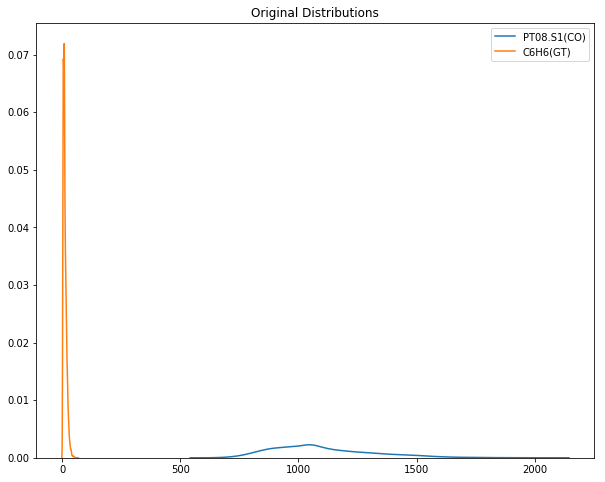

In [11]:
# plot original distribution plot for PT08.S1 (tin oxide) and C6H6(GT)
import seaborn as sns
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(data['PT08.S1(CO)'], ax=ax1)
sns.kdeplot(data['C6H6(GT)'], ax=ax1)

/Users/irenuga/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


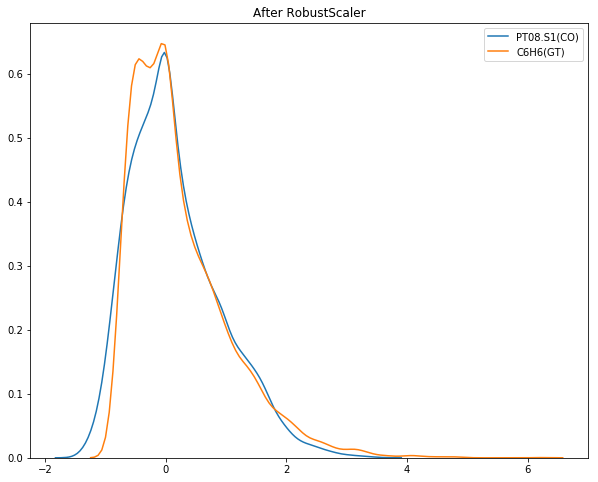

In [12]:
from sklearn import preprocessing

r_scaler = preprocessing.RobustScaler()
data_robust =data.drop(columns=['Date', 'Time'])
col_names = list(data_robust.columns)
data_r = r_scaler.fit_transform(data_robust)
data_r = pd.DataFrame(data_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After RobustScaler')

sns.kdeplot(data_r['PT08.S1(CO)'], ax=ax1)
sns.kdeplot(data_r['C6H6(GT)'], ax=ax1)

### Choose the optimal number of clusters using a dendogram

Before attempting to solve the problem, separate the predictor features in the dataset from the target feature. That is, create a matrix, usually named X, to store the predictor values.

The code to determine the optimal number of clusters is illustrated. Given the predictor matrix, X, use the following code to determine the number of clusters.

    import scipy.cluster.hierarchy as sch
    Z = sch.linkage(X, 'ward')
    plt.figure(figsize=(12,7))
    dendogram = sch.dendrogram(Z)
    
Use the `scipy.cluster.hierarchy` package to design a dendogram. 

The option 'ward' is a distance measure that minimizes the variance between clusters.

In [13]:
Tin_oxide= data['PT08.S1(CO)']
Benzene_conc= data['C6H6(GT)']

In [14]:
X= data[['PT08.S1(CO)', 'C6H6(GT)']].values

In [15]:
X 

array([[1360. ,   11.9],
       [1292. ,    9.4],
       [1402. ,    9. ],
       ...,
       [1142. ,   12.4],
       [1003. ,    9.5],
       [1071. ,   11.9]])

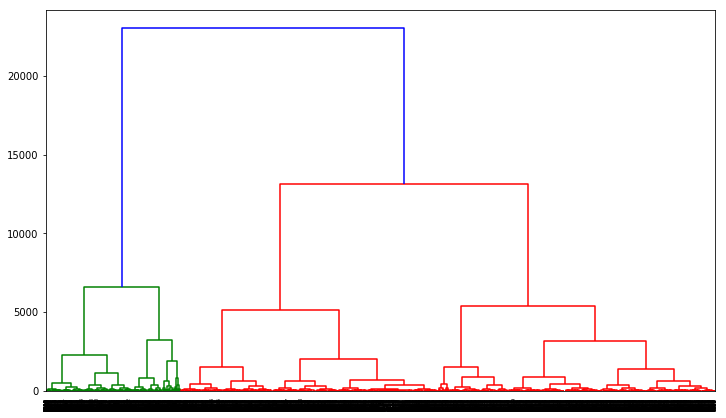

In [16]:
import scipy.cluster.hierarchy as sch
Z = sch.linkage(X, 'ward')
plt.figure(figsize=(12,7))
dendogram = sch.dendrogram(Z)

#### What is the optimal number of clusters?

Setting our disimilarity score to a 10,000 threshold, it can be seen that the number of clusters is 3.Hence 3 clusters will be chosen

The resulting diagram shows the data points on the x-axis and dissimilarity scores on the y-axis. For this exercises, let's use a dissimilarity score of 10000. A horizontal line from the threshold value intersects three branches of the dendogram. Use three as the number of clusters to for the model.

### Fit the model and do some predictions

Instead of k-Means, we'll use agglomerative clustering. Create a clustering model using the following code:

    hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
    
Then fit your model and predict using the model.

In [17]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [18]:
y = hc.fit_predict(X)

In [19]:
y

array([0, 0, 0, ..., 2, 1, 2])

Determine the labes of the clustering model.

In [20]:
labes = hc.labels_

In [21]:
labes

array([0, 0, 0, ..., 2, 1, 2])

### Visualize the clusters

Visualize the clusters with a scatter plot. Colour-code the different clusters. 

In [22]:
colors = {0 : 'r',
          1 : 'b',
          2 : 'y'} # map integer label to color

labes_color = [colors[l] for l in labes]

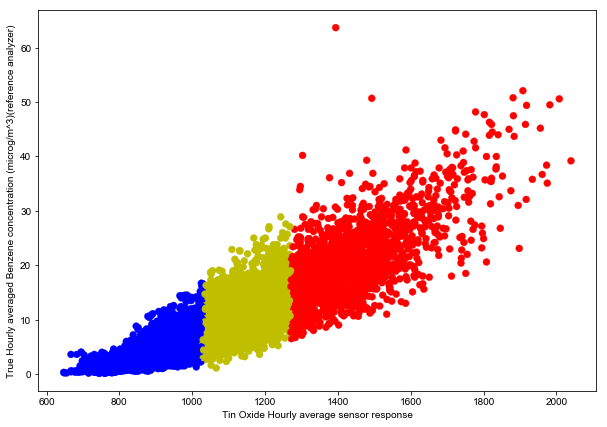

In [23]:
plt.figure('AgglomerativeClustering', figsize=(10,7))
plt.xlabel('Tin Oxide Hourly average sensor response')
plt.ylabel('True Hourly averaged Benzene concentration (microg/m^3)(reference analyzer)')
plt.style.use('seaborn')
cmap = 'tab10'
plt.scatter([X[:,0]], [X[:,1]], c=labes_color, cmap=cmap)

### Performance

In [24]:
from sklearn import metrics
print(metrics.silhouette_score(X, labes))

0.5386552778795132


### Interpretation

Silhouette coefficients measure how well samples are clustered. Here, our silhouette coefficient is 0.53.This is an average score. We can infer that the object is fairly matched to its cluster and also fairly matched to neigbouring clusters

### More clusters

Do more clusters mean anything?

Begin with 5 clusters.

In [25]:
hc_5= AgglomerativeClustering(n_clusters=5, linkage='ward')

In [26]:
y_5 = hc_5.fit_predict(X)

In [27]:
labels_5= hc_5.labels_

In [28]:
print(metrics.silhouette_score(X, labels_5))

0.4718500668240197


For 10 clusters.

In [29]:
hc_10= AgglomerativeClustering(n_clusters=10, linkage='ward')

In [30]:
y_10 = hc_10.fit_predict(X)

In [31]:
labels_10= hc_10.labels_

In [32]:
print(metrics.silhouette_score(X, labels_10))

0.4961982955309932


Prove a interpretation for the performance variation when the number of clusters are increased.

The silhouette coefficient reduces as the number increases.This simply means that the objects in the clusters are less fairly matched to each other and are too many. The best performance as evidenced from the results is 3 clusters.

Text(0, 0.5, 'True Hourly averaged Benzene concentration (microg/m^3)(reference analyzer)')

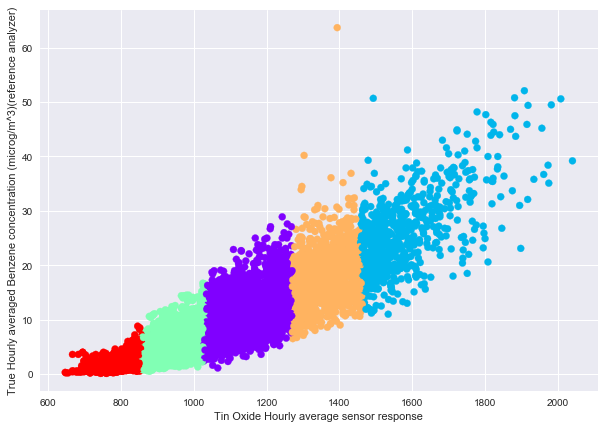

In [33]:
plt.figure(figsize=(10, 7))  
plt.scatter(X[:,0], X[:,1], c=labels_5, cmap='rainbow') 
plt.xlabel('Tin Oxide Hourly average sensor response')
plt.ylabel('True Hourly averaged Benzene concentration (microg/m^3)(reference analyzer)')

Text(0, 0.5, 'True Hourly averaged Benzene concentration (microg/m^3)(reference analyzer)')

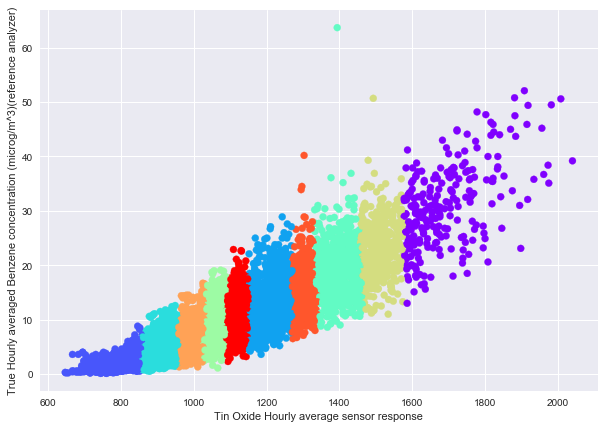

In [34]:
plt.figure(figsize=(10, 7))  
plt.scatter(X[:,0], X[:,1], c=labels_10, cmap='rainbow') 
plt.xlabel('Tin Oxide Hourly average sensor response')
plt.ylabel('True Hourly averaged Benzene concentration (microg/m^3)(reference analyzer)')

## Additional material

[Machine learning in GIS. Hierarchical Clustering for Urban Brownfields analysis.](https://www.linkedin.com/pulse/machine-learning-gis-hierarchical-clustering-urban-bielinskas)